# Project: Analyzing Macbeth

## Introduction
For our first day and first data science project, we're going to do some rudimentry analysis of Shakespeare's classic play: Macbeth! You will get practice working with lists, condtionals and dictionaries, visualizing data, and thinking analytically about data.

## Objectives
You will be able to:
* Show mastery of the content covered in this section

### Getting the Data
Here we start by importing a python package and using it to pull the transcript of Macbeth from the project Gutenberg website. We also preview a few details about what is now stored in the variable macbeth; it's a string with 119,846 characters, the first 500 of which are printed below. 

In [1]:
import requests
macbeth = requests.get('http://www.gutenberg.org/cache/epub/2264/pg2264.txt').text

print(type(macbeth))
print(len(macbeth))
print(macbeth[:500])

<class 'str'>
119846
﻿***The Project Gutenberg's Etext of Shakespeare's First Folio***
********************The Tragedie of Macbeth*********************

This is our 3rd edition of most of these plays.  See the index.


Copyright laws are changing all over the world, be sure to check
the copyright laws for your country before posting these files!!

Please take a look at the important information in this header.
We encourage you to keep this file on your own disk, keeping an
electronic path open for the nex


### Your Task

Your task is to create a bar graph of the 25 most common words in the Shakespeare's Macbeth.  


A common python programming pattern to counting objects, produce histograms, or update statistics is to make calls to a dictionary as you iterate through a list. For example, given a list of words, you can create a dictionary to store counts and then iterate through the list of words, checking how many times each word has appeared using your dictionary, and updating the dictionary count now that you've seen that word again. The `dictionary.get()` method is very useful in doing this. Read the docstring for the dictionary.get() method and use it along with the pseudocode above to create a bar graph of the 25 most common words from the transcript of Macbeth which has been loaded into a variable 'Macbeth'. Be sure to include a title and appropriate labels for your graph.

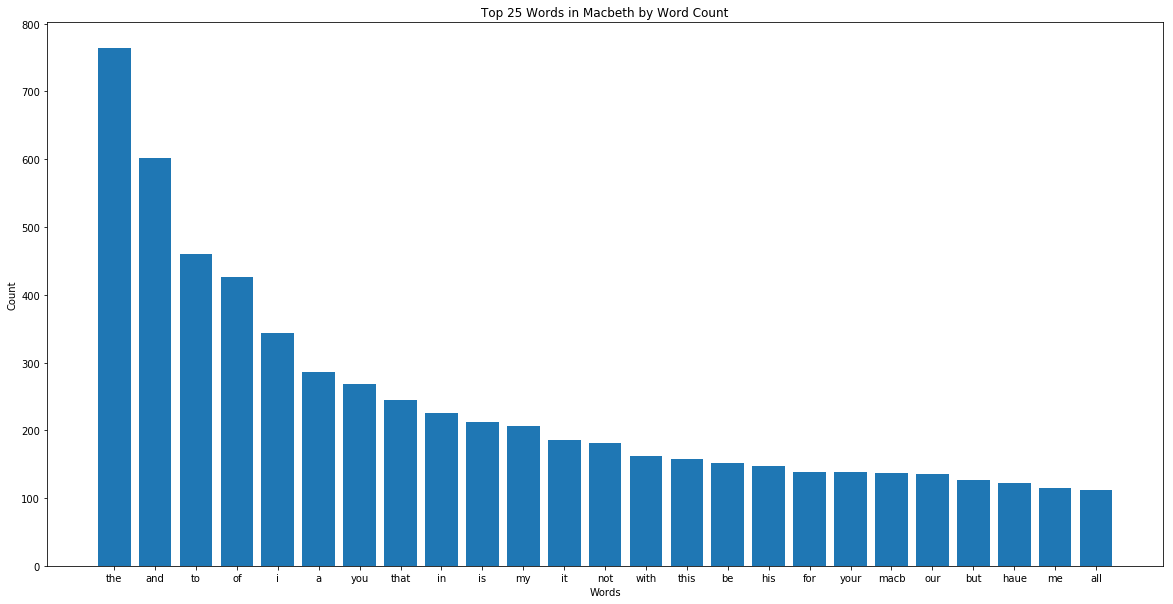

In [80]:
# Your code here
import re
import string
import matplotlib.pyplot as plt
from collections import defaultdict
from itertools import islice

# Pseudo-code Outline
# Split the transcript into words
# Create a dictionary
# Iterate through the text of Macbeth
# Update word counts
# Create Bar Graph
# Include descriptive titles and labels

# Helpful function for getting top items
def take(n, iterable):
    "Return first n items of the iterable as a list"
    return dict(islice(iterable, n))


def get_top_25(text=macbeth):
    # Get each word count
    # Init default dictionary 
    word_count = defaultdict(int)

    # Ignore punctuation and spaces
    text_clean = re.sub('[^a-z\ \']+', " ", text.lower())
    for word in text_clean.split():
        word_count[word] += 1

    # Get top 25 words
    top_25 = take(25, sorted(word_count.items(), key=lambda x: x[1], reverse=True))
    words, count = list(top_25.keys()), list(top_25.values())
    return words, count


words, count = get_top_25()

# Plotting
plt.figure(figsize=(20, 10))
plt.bar(words, count)
plt.xlabel('Words')
plt.ylabel('Count')
plt.title('Top 25 Words in Macbeth by Word Count')
plt.show()

### Level Up (Optional)
This project should take you about an hour and a half to complete. If you're done much more quickly than that and are not behind in the course, feel free to deepen your knowledge by completing any or all of the following tasks until you run out of time:
* Create a list of top characters by mentions of their names 
* Split the text by which character is talking
* Create sub graphs of the most common words by character
* Reduce the string to the text of the play itself. (Remove any initial notes, forward, introduction, appendix, etc.)
* Come up with some other fun analyses of the text!

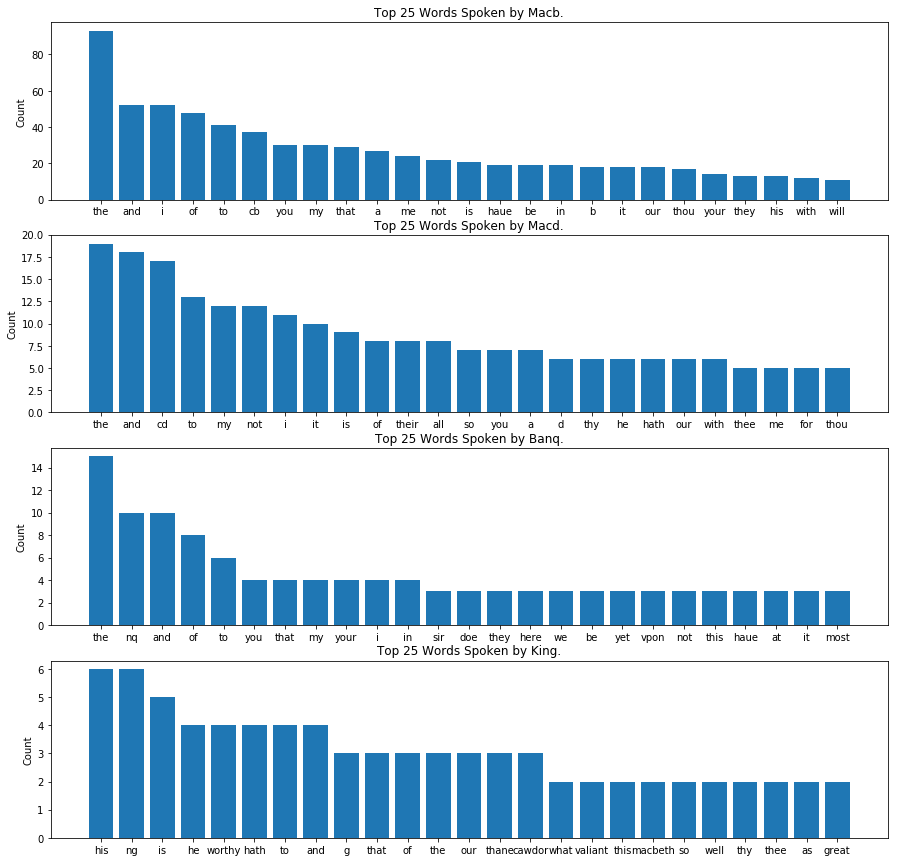

In [94]:
# Get only lines spoken by certain characters
def get_character_lines(char='Macb.'):
    lines = ""
    start = False
    for line in macbeth.split('\r\n'):
        # This initializes a line by macbeth
        if char in line:
            start = True
        # Otherwise, another character will be speaking
        # The only other time . occurs is when another character speaks
        elif '.' in line:
            start = False
        if start:
            # Ignore Macb.
            lines += line[5:]
    return lines


def get_mult_lines(char_list):
    # Get each character's lines
    line_list = [get_character_lines(char=x) for x in char_list]
    # Zip for easy access to name and lines
    return list(zip(char_list, line_list))
    

def plot_wordcounts(lines):
    f = plt.figure()
    for i, v in enumerate(lines):
        plt.subplot(4, 1, i+1)
        char = v[0]
        words, count = get_top_25(text=v[1])
        
        # Plotting
        plt.bar(words, count)
        #plt.xlabel('Words')
        plt.ylabel('Count')
        plt.title('Top 25 Words Spoken by {}'.format(char))
    f.set_figheight(15)
    f.set_figwidth(15)
    plt.show()

    
lines = get_mult_lines(['Macb.', 'Macd.', 'Banq.', 'King.'])
plot_wordcounts(lines)




## Summary
Congratulations! You've got some extra practice combining various data types into useful programming patterns and done an intitial analysis of a classic text!